# Tutorial 1: The Basics

Let's learn by example. We start prediction future energy prices and will explore the basics of the library.

We assume you already have installed the package and have a working Python environment. If not, please refer to the [installation guide](installation.md).

```shell
python -m neuralprophet --version
```

If NeuralProphet is installed, you should see the installed version number. Otherwise you will get a package not found error message.



## Preparing the dataset

We are using a dataset with energy prices and other related data. Please ignore everything apart from the energy price for now.

https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather

Let's have a first look at our data.

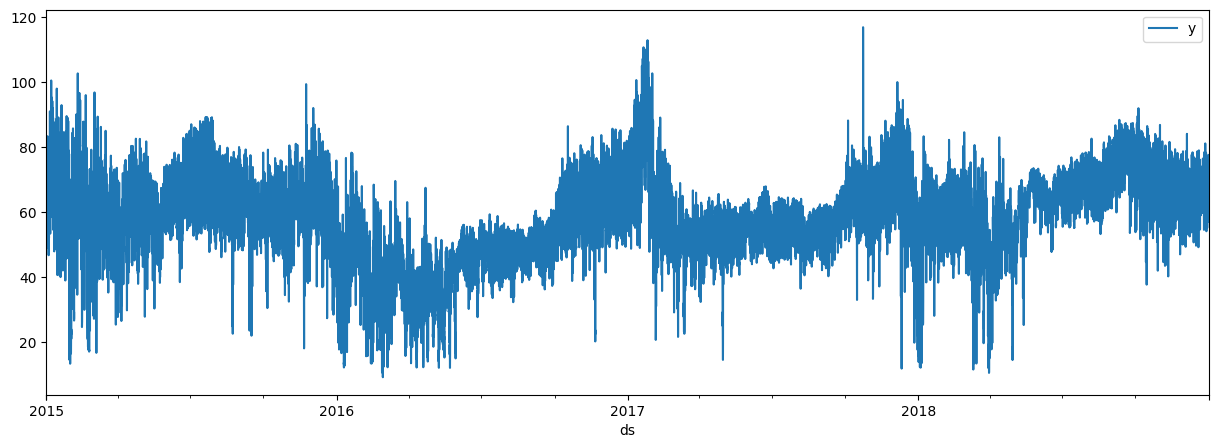

In [1]:
import pandas as pd

df = pd.read_csv("datasets/energy_dataset.csv")
df = df[["time", "price actual"]].dropna()
df = df.rename(columns={"time": "ds", "price actual": "y"})
df["ds"] = pd.to_datetime(df["ds"], utc=True).dt.tz_localize(None)
plt = df.plot(x="ds", y="y", figsize=(15, 5))

Dataset must be a pandas dataframe with the following format and properties:

1. Time series column must be named "ds" and contain a datetime object without timezone information.
2. Value column must be named "y" and contain a float value.

## Setting up the model

In [2]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
metrics = m.fit(df)
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 75


  0%|          | 0/163 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.90E-01, min: 6.81E-01


  0%|          | 0/163 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.90E-01, min: 1.00E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.53E-01
Epoch[75/75]: 100%|██████████| 75/75 [01:33<00:00,  1.25s/it, SmoothL1Loss=0.00647, MAE=5.86, RMSE=7.87, Loss=0.00467, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


## Viewing the results

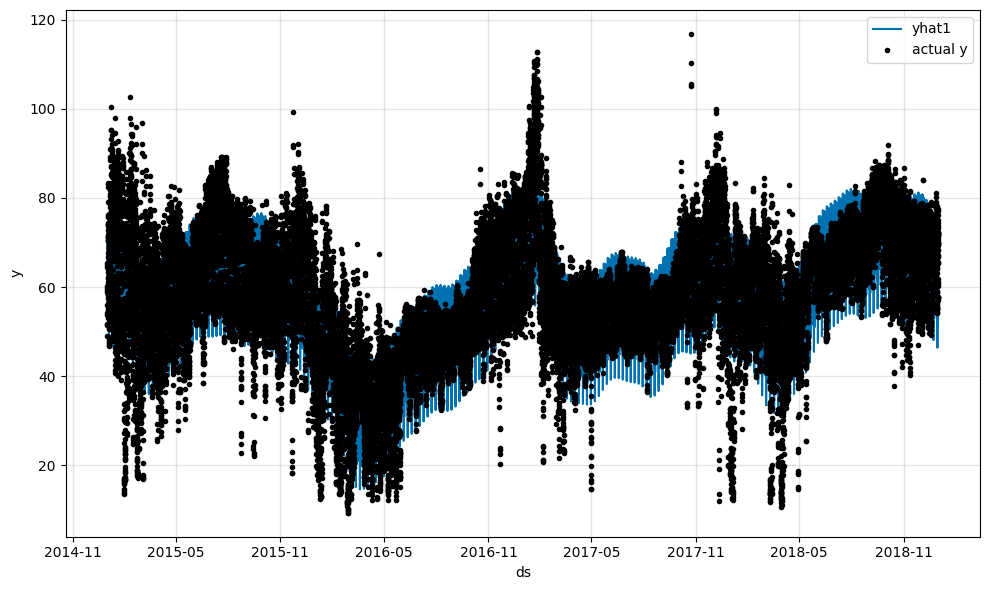

In [3]:
fig = m.plot(forecast)